Chapter 8 K-Mean Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

ในตัวอย่างนี้จะทำการสร้างชุดข้อมูลเรียนรู้ด้วย method make_blobs ของ scikit-learn ซึ่งจะทำการสร้างชุดข้อมูลที่มีลักษณะการกระจายตัวเเบบ การแจกแจงแบบปรกติหลายตัวแปร (multivariate normal distribution) โดยในตัวอย่างนี้จะพิจารณา 3 คุณลักษณะเพื่อให้สามารถวิเคราะห์ด้วยกราฟ 3 มิติ ได้

In [2]:
from sklearn.datasets import make_blobs
# สร้างข้อมูลจำนวน 1000 sample ซึ่งประกอบด้วย 5 คุณลักษณะ เเละเเบ่งเป็น 4 กลุ่ม
X,y = make_blobs(n_samples=1000, n_features= 3, centers=4,random_state=7) 

ทดลองเเสดงตัวอย่างข้อมูลเพื่อตรวจสอบข้อมูล

In [3]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,2,target
0,-0.295289,4.318606,4.619505,3
1,0.400231,-9.949889,-3.714982,2
2,3.075527,9.761848,-0.122043,1
3,-7.588113,6.090520,-1.262324,0
4,1.019212,4.472542,5.721384,3


เเสดงความสัมพันธ์ระหว่างคุณลักษณะ(features) ของข้อมูล โดยใช้ pairplot ของ seaborn

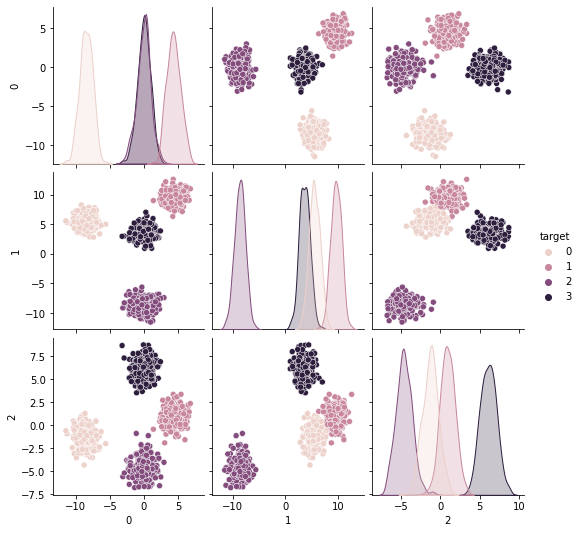

In [4]:
sns.pairplot(data=df,hue='target');

ทดลองเเสดงข้อมูลในข้อมูล 3 มิติ

In [5]:
# จัดรูปข้อมูลให้อยู่ในรูปของ numpy array สำหรับการพล็อตกราฟ 3 มิติ
dz = df.drop(columns=['target'])
arr = dz.to_numpy()
arr

array([[-0.2952888 ,  4.31860629,  4.61950476],
       [ 0.40023141, -9.94988909, -3.71498244],
       [ 3.07552698,  9.76184769, -0.1220427 ],
       ...,
       [-0.29743063, -8.64520888, -5.01815141],
       [-8.37715963,  4.76220347, -1.1361044 ],
       [-6.9761951 ,  5.31574061, -1.123167  ]])

In [6]:
import plotly.graph_objs as go
layout = go.Layout(width = 1400, height =1000,title_text='Data')
fig = go.Figure(data=[go.Scatter3d(x=arr[:,0],y=arr[:,1],z=arr[:,2],mode='markers',
        marker=dict( size=3, opacity=0.6,))], layout=layout)
fig.show()

**จัดกลุ่มของข้อมูลด้วยวิธี K-mean Clustering โดยใช้ library ของ scikit learn**

โดยขั้นตอนแรกจะทำการหาจำนวน Clusters ที่เหมาะสมที่สุดด้วย Elbow Method

In [7]:
from sklearn.cluster import KMeans 
import plotly.express as px
elbow = []
for i in range(1,11):
  nClusters = KMeans(n_clusters=i)
  nClusters.fit(df)
  elbow.append(nClusters.inertia_)

fig = px.line(x=range(1,11),y=elbow)
fig.update_layout(
    title="Elbow Method",
    xaxis_title="K_clusters",
    yaxis_title="Square Error",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

จากผลการทดสอบพบว่า มีจุด Elbow อยู่ที่ค่า 4 ดังเป้าหมายที่สร้างขึ้น ดังนั้นจึงใช้ K = 4 ในการสร้างโมเดล KMeans Clustering

In [ ]:
kmean = KMeans(n_clusters=4)

In [ ]:
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

เมื่อทำการเรียนรู้เเล้ว ทำการลดลองทำนายค่ากลุ่มโดย

In [ ]:
y_pred = kmean.predict(df)

In [ ]:
y_pred

array([0, 1, 3, 2, 0, 0, 3, 2, 0, 0, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 3,
       1, 2, 0, 0, 3, 3, 3, 1, 0, 3, 2, 0, 1, 0, 2, 2, 2, 3, 0, 0, 1, 1,
       2, 0, 3, 0, 1, 0, 2, 3, 0, 2, 3, 0, 2, 1, 3, 2, 2, 1, 2, 0, 3, 2,
       0, 2, 1, 3, 0, 1, 2, 0, 0, 1, 3, 3, 2, 2, 1, 1, 1, 0, 3, 1, 1, 3,
       0, 0, 0, 2, 3, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 3, 2, 3, 2, 0, 1, 0,
       3, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 3, 3, 0, 0, 0, 2, 3, 2, 2, 0, 0,
       3, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 3,
       2, 2, 0, 1, 0, 3, 3, 3, 0, 3, 2, 1, 3, 1, 0, 0, 2, 3, 3, 0, 3, 0,
       3, 2, 1, 2, 2, 3, 3, 3, 1, 2, 0, 2, 1, 0, 3, 3, 3, 1, 2, 3, 2, 0,
       3, 0, 2, 1, 2, 0, 3, 0, 3, 3, 1, 3, 3, 1, 1, 0, 1, 2, 1, 1, 3, 1,
       2, 1, 1, 1, 1, 1, 3, 3, 0, 3, 2, 1, 1, 2, 1, 2, 3, 3, 2, 1, 2, 0,
       2, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 2, 2, 2, 1, 3, 2, 0, 1, 3, 3, 3, 0, 2, 0, 2, 2, 0, 3, 0,
       2, 2, 2, 2, 3, 0, 0, 0, 2, 2, 0, 2, 1, 3, 0,

ทดลองเเสดงจุด centroid ของกลุ่ม โดยพล็อตด้วยจุดสีแดง  ซึ่งจุด Centroid จะอยู่ ณ ตำเเหน่งกึ่งกลางของทุกกลุ่ม

In [ ]:
layout = go.Layout(width = 1400, height =1000,title_text='Centroid')
fig = go.Figure(data=[go.Scatter3d(x=arr[:,0],y=arr[:,1],z=arr[:,2],mode='markers',
        marker=dict(size=3,color=y_pred, colorscale='Viridis', opacity=0.6,  showscale =True
        ))], layout=layout)
fig.add_scatter3d(x=kmean.cluster_centers_[:,0],y=kmean.cluster_centers_[:,1],
                  z=kmean.cluster_centers_[:,2], mode='markers')
fig.show()